<a href="https://colab.research.google.com/github/a-chan041/CS497-TurnipPricePredictor/blob/master/TurnipPredictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# monday-saturday day number (no sunday)
# and sell price

# 0 means not recorded so we skip that value
week_pairs = [
    [
        # Monday 4/6 AM
        (0.0, 0),
        # Monday 4/6 PM
        (0.5, 0),
        (1.0, 150),
        (1.5, 160),
        (2.0, 154),
        (2.5, 61),
        (3.0, 57),
        (3.5, 51),
        (4.0, 48),
        (4.5, 44),
        (5.0, 40),
        (5.5, 37),
    ],

    [
        # Monday 4/13 AM
        (0.0, 96),
        (0.5, 94),
        (1.0, 88),
        (1.5, 84),
        (2.0, 81),
        (2.5, 77),
        (3.0, 73),
        (3.5, 68),
        (4.0, 64),
        (4.5, 61),
        (5.0, 57),
        (5.5, 51),
    ],

    [
        # Monday 4/20 AM
        (0.0, 80),
        (0.5, 76),
        (1.0, 72),
        (1.5, 68),
        (2.0, 84),
        (2.5, 86),
        (3.0, 126),
        (3.5, 180),
        (4.0, 137),
        (4.5, 53),
        (5.0, 50),
        (5.5, 46),
    ],

    [
        # Monday 4/27 AM
        (0.0, 89),
        (0.5, 85),
        (1.0, 82),
        (1.5, 78),
        (2.0, 74),
        (2.5, 137),
        (3.0, 165),
        (3.5, 169),
        (4.0, 155),
        (4.5, 53),
        (5.0, 49),
        (5.5, 43),
    ],

    [
        # Monday 5/4 AM
        (0.0, 73),
        (0.5, 68),
        (1.0, 63),
        (1.5, 124),
        (2.0, 138),
        (2.5, 155),
        (3.0, 194),
        (3.5, 166),
        (4.0, 72),
        (4.5, 68),
        (5.0, 65),
        (5.5, 60),
    ],
    
    # [
    #     # Monday 5/11 AM
    #     (0.0, 84),
    #     (0.5, 80),
    #     (1.0, 0),
    #     (1.5, 0),
    #     (2.0, 0),
    #     (2.5, 0),
    #     (3.0, 0),
    #     (3.5, 0),
    #     (4.0, 0),
    #     (4.5, 0),
    #     (5.0, 0),
    #     (5.5, 0),
    # ],
]

MAX_Y = 100

def cleaned_pairs(selection):
  new_pairs = []
  for pair in week_pairs[selection]:
    (day, price) = pair
    if price < MAX_Y and price != 0:
      new_pairs.append(pair)

  return new_pairs

def get_week(selection):
    Xs = [day for (day, price) in cleaned_pairs(selection)]
    Ys = [price for (day, price) in cleaned_pairs(selection)]
    return (Xs, Ys)

def select_split(selection):
    (Xs, Ys) = get_week(selection)
    X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=.25, random_state=0)
    return X_train, y_train, X_test, y_test


def select_model(selection):
    X, Y, _, _ = select_split(selection)
    X_train = np.array(X).reshape(-1, 1)
    model = LinearRegression().fit(X_train, Y)
    return model


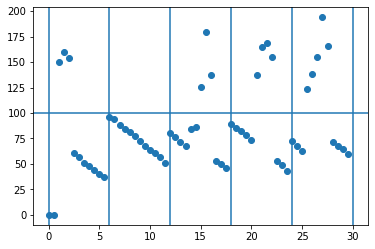

In [0]:

# concatted x and y for plotting
X = []
Y = []
total_day = 0.0
for pairs in week_pairs:
  for (_day, price) in pairs:
    X.append(total_day)
    total_day += 0.5
    Y.append(price)

regr = select_model(0)
plt.axhline(y=MAX_Y)
plt.axvline(x=0.0)
plt.axvline(x=6.0)
plt.axvline(x=12.0)
plt.axvline(x=18.0)
plt.axvline(x=24.0)
plt.axvline(x=30.0)
plt.scatter(X, Y)

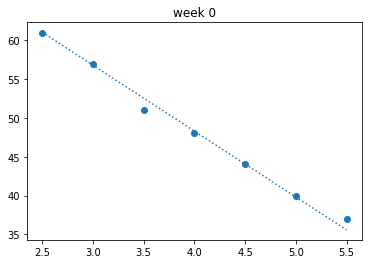

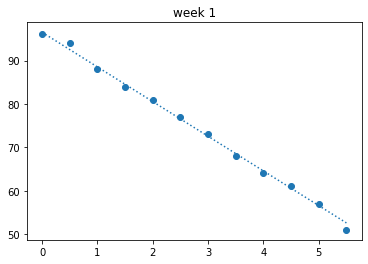

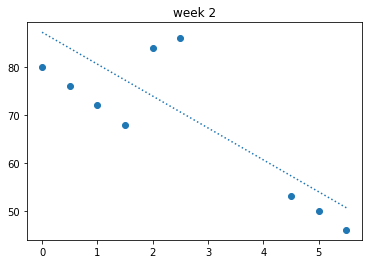

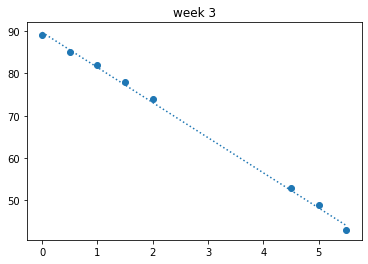

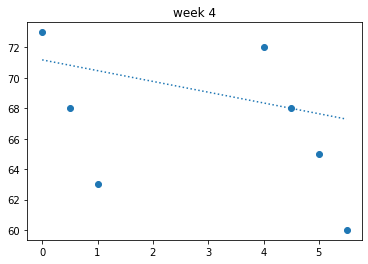

In [0]:
for (week, _) in enumerate(week_pairs):
  (X, Y) = get_week(week)
  regr = select_model(week)
  
  fig, ax = plt.subplots()
  ax.set_title("week " + str(week))
  ax.scatter(X, Y)
  pred = regr.predict(np.array(X).reshape(-1,1))
  ax.plot(X, pred, ":")

In [0]:
from sklearn.metrics import mean_squared_error

# use the testing set for each model
for (week, _) in enumerate(week_pairs):
  model = select_model(week)
  (_, _, X, Y) = select_split(week)
  y_pred = model.predict(np.array(X).reshape(-1,1))
  print("Mean Squared Error Week", week, round(mean_squared_error(Y, y_pred), 2))


Mean Squared Error Week 0 2.22
Mean Squared Error Week 1 1.0
Mean Squared Error Week 2 50.9
Mean Squared Error Week 3 0.51
Mean Squared Error Week 4 54.49


In [0]:

from sklearn.externals import joblib 
#save model as diabetes.pkl
regr = select_model(1)
model_name = "turnip_model.pk1"
joblib.dump(regr,model_name)
#loading the model



['turnip_model.pk1']

In [0]:
import joblib

model = joblib.load('turnip_model.pk1')
coef = float(model.coef_[0])
y = float(input("Enter the sell value for Monday (am or pm): "))
x = float(input("Enter day to estimate (numbered 0-5 with 0 being Monday): "))
print("Estimated sell amount is: " , int(x*coef + y))


Enter the sell value for Monday (am or pm): 100
Enter day to estimate (numbered 0-5 with 0 being Monday): 3
Estimated sell amount is:  76
